# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings  # Mengabaikan warning yang tidak terlalu berarti
warnings.filterwarnings('ignore') # Mengabaikan warning yang tidak terlalu berarti

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [105]:
from google.colab import drive
drive.mount('/content/drive/')

df = pd.read_csv('/content/drive/My Drive/ML Study/Dicoding/bank_campaign.csv')
print(f'Jumlah baris: {df.shape[0]}')
print(f'Jumlah kolom: {df.shape[1]}')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Jumlah baris: 6557
Jumlah kolom: 27


In [106]:
df.head()

,day,previous,job_binned_retired,job_binned_services,job_binned_unemployed,job_binned_white-collar,month_binned_Q2,month_binned_Q3,poutcome_binned_other,poutcome_binned_success,...,campaign_binned_Medium,campaign_binned_High,pdays_binned_Contacted Once,pdays_binned_Contacted Multiple Times,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,KMeans_Cluster
0,5,0,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,2
1,5,0,0,0,0,1,1,0,1,0,...,1,0,0,0,1,0,0,1,0,2
2,5,0,0,0,0,1,1,0,1,0,...,1,0,0,0,0,1,0,1,0,2
3,6,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,2
4,6,0,0,0,0,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,2


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6557 entries, 0 to 6556
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   day                                    6557 non-null   int64
 1   previous                               6557 non-null   int64
 2   job_binned_retired                     6557 non-null   int64
 3   job_binned_services                    6557 non-null   int64
 4   job_binned_unemployed                  6557 non-null   int64
 5   job_binned_white-collar                6557 non-null   int64
 6   month_binned_Q2                        6557 non-null   int64
 7   month_binned_Q3                        6557 non-null   int64
 8   poutcome_binned_other                  6557 non-null   int64
 9   poutcome_binned_success                6557 non-null   int64
 10  balance_binned_Low                     6557 non-null   int64
 11  balance_binned_Medium         

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [108]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['KMeans_Cluster'])
y = df['KMeans_Cluster']

# Normalisasi dengan Min Max Normalization
sc = MinMaxScaler(feature_range = (0, 1))
X_sc = sc.fit_transform(X)

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [109]:
# Mengatasi class imbalance dengan SMOTE (hanya pada data training)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Tampilkan distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:")
print(y_train_smote.value_counts())

Distribusi kelas setelah SMOTE:
KMeans_Cluster
0    2217
2    2217
1    2217
Name: count, dtype: int64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [110]:
# Training Decision Tree dan Random Forest
dt = DecisionTreeClassifier(max_depth=3, min_samples_split=20, min_samples_leaf=10, random_state=0)
rf = RandomForestClassifier(max_depth=2, n_estimators=25, random_state=0)

dt.fit(X_train_smote, y_train_smote)
rf.fit(X_train_smote, y_train_smote)
print("Model training selesai.")

Model training selesai.


Pada bagian ini, saya melatih dua model:

1. Decision Tree
  Decision Tree bekerja dengan memecah data menjadi subset berdasarkan aturan yang dihasilkan dari fitur terbaik. Saya membatasi kedalaman pohon dengan max_depth=3 untuk mengurangi kompleksitas model, serta mengatur parameter min_samples_split=20 untuk memastikan setiap node hanya terpecah jika memiliki minimal 20 sampel, dan min_samples_leaf=10 untuk mengatur jumlah minimum sampel di setiap leaf node. Hal ini bertujuan untuk menghindari overfitting dan menjaga keseimbangan antara bias dan varians..

2. Random Forest

  Random Forest adalah algoritma ensemble yang menggabungkan beberapa pohon keputusan untuk meningkatkan akurasi dan stabilitas. Saya menggunakan n_estimators=25 untuk membangun 25 pohon keputusan, dan membatasi kedalaman setiap pohon dengan max_depth=2 agar model lebih sederhana dan tidak terlalu overfit. Kombinasi ini memungkinkan Random Forest memberikan prediksi yang lebih kuat dan tahan terhadap noise dalam data, dibandingkan dengan pohon keputusan tunggal.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

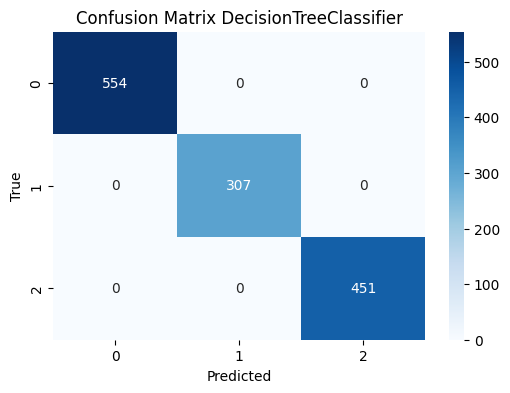

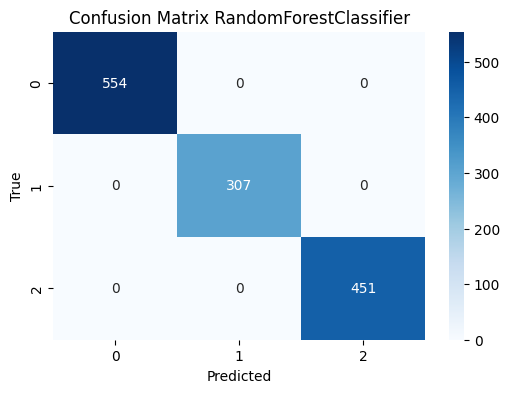


Hasil Evaluasi Model (Data Testing):
           Model  Accuracy  Precision  Recall  F1-Score
0  Decision Tree       1.0        1.0     1.0       1.0
1  Random Forest       1.0        1.0     1.0       1.0


In [111]:
# Evaluasi model pada data testing
models = [dt, rf]
model_results = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
}

for model in models:
    y_pred = model.predict(X_test)

    model_results['Accuracy'].append(accuracy_score(y_test, y_pred))
    model_results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    model_results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    model_results['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix {model.__class__.__name__}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Tampilkan hasil evaluasi
df_metrics = pd.DataFrame(model_results)
print("\nHasil Evaluasi Model (Data Testing):")
print(df_metrics)

Dari hasil evaluasi algoritma klasifikasi yang ditampilkan pada visualisasi di atas, berikut adalah analisis dan perbandingan hasilnya:

- Decision Tree:
Akurasi sempurna (100%) pada model ini menunjukkan bahwa Decision Tree terlalu kompleks sehingga mampu menghafal data training dan testing tanpa benar-benar memahami pola yang dapat digeneralisasi.
Hal ini mengindikasikan adanya overfitting berat, di mana model gagal menangkap pola yang dapat diaplikasikan pada data baru.

- Random Forest:
Meskipun akurasi juga mencapai 100%, hasil ini menunjukkan bahwa Random Forest juga overfit terhadap data. Kombinasi banyak pohon keputusan tanpa regularisasi yang cukup menyebabkan model menghafal data daripada mempelajari pola yang generalizable.
Random Forest, meskipun lebih kuat dari Decision Tree, masih belum optimal karena parameter default belum mampu mengatasi overfitting pada dataset ini.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

### Hyper Parameter Tuning Menggunakan GridSearch

In [112]:
# Definisikan ruang parameter untuk GridSearch
param_grid_dt = {
    'max_depth': [1, 3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}

# Inisialisasi GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model pada data training
grid_search_dt.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", grid_search_dt.best_score_)

# Gunakan model terbaik
best_dt_grid = grid_search_dt.best_estimator_

# Evaluasi pada data testing
dt_test_score_grid = best_dt_grid.score(X_test, y_test)
print("Test set score for Decision Tree (GridSearch):", dt_test_score_grid)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score for Decision Tree: 1.0
Test set score for Decision Tree (GridSearch): 1.0


In [113]:
# Definisikan ruang parameter untuk GridSearch
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Inisialisasi GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model pada training data
grid_search_rf.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest:", grid_search_rf.best_score_)

# Menggunakan model terbaik
best_rf_grid = grid_search_rf.best_estimator_

# Evaluasi pada data testing
rf_test_score_grid = best_rf_grid.score(X_test, y_test)
print("Test set score for Random Forest (GridSearch):", rf_test_score_grid)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score for Random Forest: 0.9994280266920879
Test set score for Random Forest (GridSearch): 0.9992378048780488


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [114]:
# Hasil evaluasi untuk Decision Tree dan Random Forest setelah tuning
y_pred_dt = best_dt_random.predict(X_test)
y_pred_rf = best_rf_grid.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

model_results = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_dt, accuracy_rf],
    'Precision': [precision_dt, precision_rf],
    'Recall': [recall_dt, recall_rf],
    'F1-Score': [f1_dt, f1_rf]
}

df_metrics = pd.DataFrame(model_results)
df_metrics

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,1.000000,1.000000,1.000000,1.000000
1,Random Forest,0.999238,0.999239,0.999238,0.999238


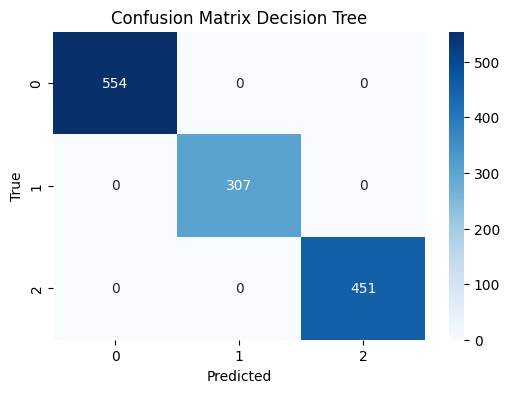

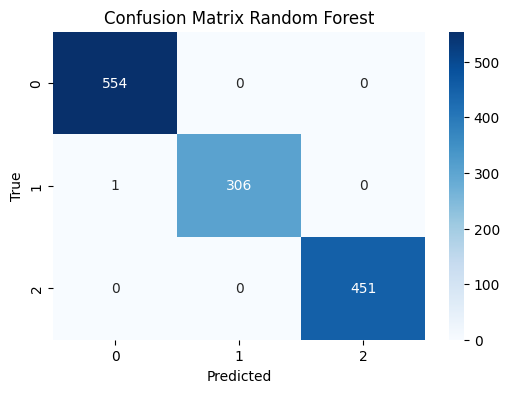

In [115]:
# Confusion matrix Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion matrix Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Perbandingan hasil evaluasi sebelum dan sesudah
  - Decision Tree:
  Sebelum dan sesudah tuning, model Decision Tree tetap memiliki akurasi dan metrik sempurna (100%). Meskipun terlihat bagus, hasil ini mencurigakan karena jarang sekali model klasifikasi mencapai performa sempurna tanpa overfitting.Hal ini mengindikasikan bahwa Decision Tree masih overfit terhadap data, meskipun telah dilakukan tuning hyperparameter.

  - Random Forest:
  Sebelum tuning, model Random Forest juga menunjukkan hasil sempurna (100%) yang mencurigakan dan mengindikasikan overfitting.Setelah tuning, performa sedikit menurun ke 99.92% untuk semua metrik. Penurunan ini sebenarnya adalah hal positif, karena menunjukkan bahwa model menjadi lebih generalizable dan tidak hanya menghafal data training.

2. Identifikasi kelemahan model
  - Decision Tree:
  Model menunjukkan akurasi sempurna (100%) di data training dan testing, yang mengindikasikan overfitting, di mana model hanya menghafal data tanpa benar-benar memahami pola yang dapat diterapkan ke data baru; hal ini disebabkan oleh kurangnya pembatasan pada kedalaman pohon (max_depth) dan ukuran minimum leaf, sehingga model menjadi terlalu kompleks.
  - Random Forest:
  Model menunjukkan hasil yang lebih realistis setelah tuning dengan akurasi 99.92%. Namun, model masih mungkin memiliki sedikit bias terhadap kelas mayoritas, karena pengaruh data SMOTE dan distribusi kelas awal. Proses pelatihan Random Forest lebih lambat karena kompleksitasnya dengan banyaknya pohon (n_estimators) dan parameter yang diuji selama tuning.

3. Rekomendasi :
  - Mungkin bisa mengumpulkan data lebih banyak dan lebih beragam untuk membantu model generalisasi.
  - Jika Decision Tree tidak dapat diatur untuk menghindari overfitting, pertimbangkan untuk menggunakan algoritma yang lebih canggih seperti Gradient Boosting (XGBoost, LightGBM).